In [2]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In this example, we will explore statistics for two classic novels, *Moby Dick* and *Little Women*. The text of any book can be read by a computer at great speed. Books published before 1923 are currently in the *public domain*, meaning that everyone has the right to copy or use the text in any way. [Project Gutenberg](http://www.gutenberg.org/) is a website that publishes public domain books online. Using Python, we can load the text of these books directly from the web.

The features of Python used in this example will be explained in detail later in the course. This example is meant to illustrate some of the broad themes of this text. Don't worry if the details of the program don't yet make sense. Instead, focus on interpreting the images generated below. The "Expressions" section later in this chapter will describe most of the features of the Python programming language used below.

First, we read the text of both books into lists of chapters, called `moby_dick_chapters` and `little_women_chapters`. In Python, a name cannot contain any spaces, and so we will of often use an underscore `_` to stand in for a space. The `=` in the lines below give a name on the left to the result of some computation described on the right. A *uniform resource locator* or *URL* is an address on the Internet for some content; in this case, the text of a book.

In [3]:
# Read two books, fast!

moby_dick_url = 'http://www.gutenberg.org/cache/epub/2701/pg2701.txt'
moby_dick_text = read_url(moby_dick_url)
moby_dick_chapters = moby_dick_text.split('CHAPTER ')[2:]

little_women_url = 'http://www.gutenberg.org/cache/epub/514/pg514.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

While a computer cannot understand the text of a book, we can still use it to provide us with some insight into the structure of the text. The name `moby_dick_chapters` is currently bound to a list of all the chapters in the book. We can place those chapters into a column to see how each begins.

In [4]:
Table([moby_dick_chapters], ['Chapters'])

Chapters
1. Loomings. Call me Ishmael. Some years ago--never mind ...
2. The Carpet-Bag. I stuffed a shirt or two into my old ...
3. The Spouter-Inn. Entering that gable-ended Spouter-In ...
4. The Counterpane. Upon waking next morning about dayli ...
"5. Breakfast. I quickly followed suit, and descending in ..."
6. The Street. If I had been astonished at first catchin ...
7. The Chapel. In this same New Bedford there stands a W ...
8. The Pulpit. I had not been seated very long ere a man ...
"9. The Sermon. Father Mapple rose, and in a mild voice o ..."
10. A Bosom Friend. Returning to the Spouter-Inn from th ...


Each chapter begins with a chapter number and a title: "Loomings" and "The Spouter-Inn" and the like. The rest of the text describes Ishmael's adventures aboard the Pequod, as he obsesrves Captain Ahab searching for the great white whale Moby Dick. We can quickly visualize how many times Ahab and Moby Dick have each been mentioned at any point in the book.

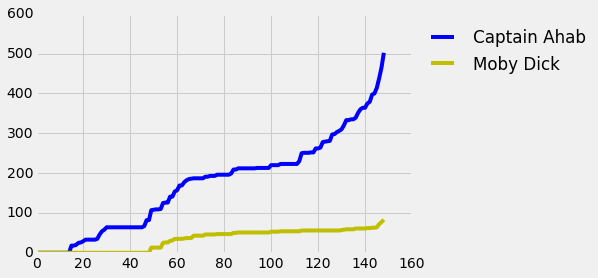

In [5]:
counts = Table([np.char.count(moby_dick_chapters, "Ahab"), 
                np.char.count(moby_dick_chapters, "Moby Dick")], 
               ["Captain Ahab", "Moby Dick"])
counts.cumsum().plot(overlay=True)

In the plot above, the horizontal axis shows chapter numbers and the vertical axis shows how many times each character has been mentioned so far. We've already discovered a quirk of this classic novel: the whale Moby Dick isn't even mentioned until nearly 50 chapters into the book! Until the very end, when the whale is finally found, Moby Dick is rarely brought up, mentioned fewer than 100 times in all.

*Little Women* is a story of four sisters growing up together during the civil war. In this book, chapter numbers are spelled out and chapter titles are written in all capital letters.

In [6]:
Table({'Chapters': little_women_chapters})

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


We can track the mentions of main characters to learn about the plot of this book as well.  The protagonist Jo interacts with all of her sisters regularly, up until Chapter 27 when she moves to New York alone.

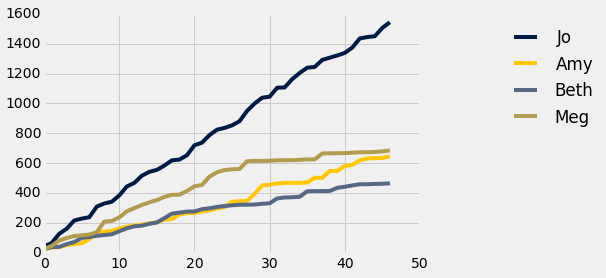

In [11]:
sisters = ["Meg", "Jo", "Beth", "Amy"]
sister_counts = Table({sis: np.char.count(little_women_chapters, sis) for sis in sisters})
sister_counts.cumsum().plot(overlay=True)

Investigating data using visualizations, such as these cumulative count plots, is the central theme of Chapter 2 of this text. One of the central goals of this text is to provide you with the tools to visualize a wide range of data — numbers, text, and structures — while learning to interpret the resulting images.

Chapter 3 investigates the problem of determining whether two similar patterns are really the same or different. For example, the word "character" has a second meaning: a printed symbol such as a letter or number. Below, we compare the counts of this type of character in the first chapter of *Little Women*.

In [12]:
from collections import Counter

chapter_one = little_women_chapters[0]
counts = Counter(chapter_one.lower())
letters = Table([counts.keys(), counts.values()], ['Letters', 'Chapter 1 Count'])
letters.sort('Letters').show(20)

Letters,Chapter 1 Count
,4102
!,28
"""",190
',125
",",423
-,21
.,189
;,4
?,16
_,6


How do these counts compare with the character counts in Chapter 2? By plotting both sets of counts in one chart, we can see slight variations for every character. Is that difference meaningful? The material from Chapter 3 will answer that question precisely.

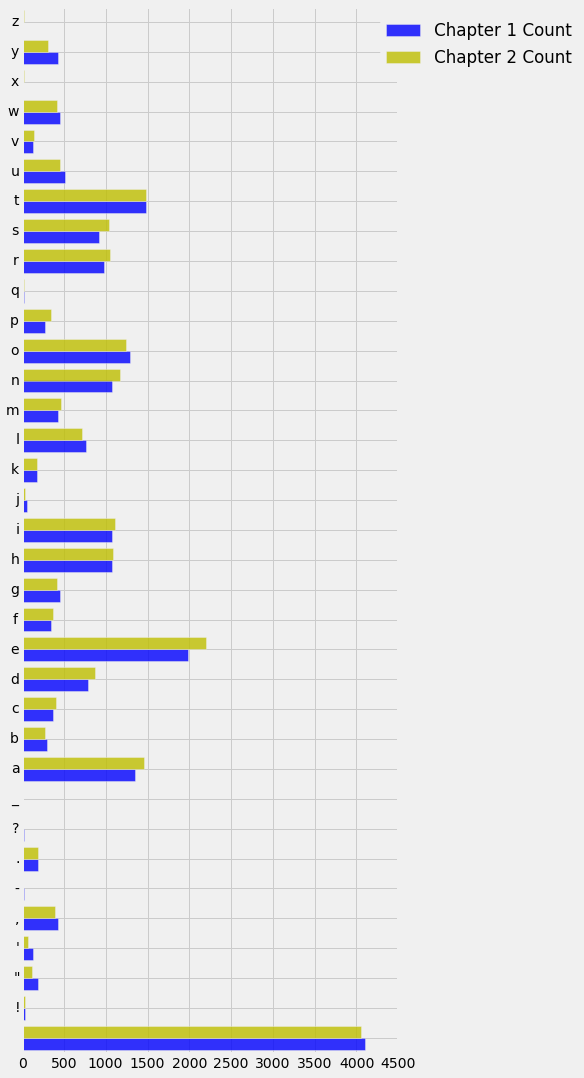

In [9]:
counts = Counter(little_women_chapters[1].lower())
two_letters = Table([counts.keys(), counts.values()], ['Letters', 'Chapter 2 Count'])
compare = letters.join('Letters', two_letters)
compare.barh('Letters', overlay=True)

In Chapters 4 and 5, we will learn to describe the relationships between quantities and use that information to make predictions. Data-driven decisions are the hallmark of *machine learning* a blossoming field at the intersection of computer science and statistics. The example below shows a visualization of all chapters in both books, with *Moby Dick* chapters colored blue and *Little Women* chapters colored yellow. The position of each dot is chosen so that chapters that contain similar words are close together. 

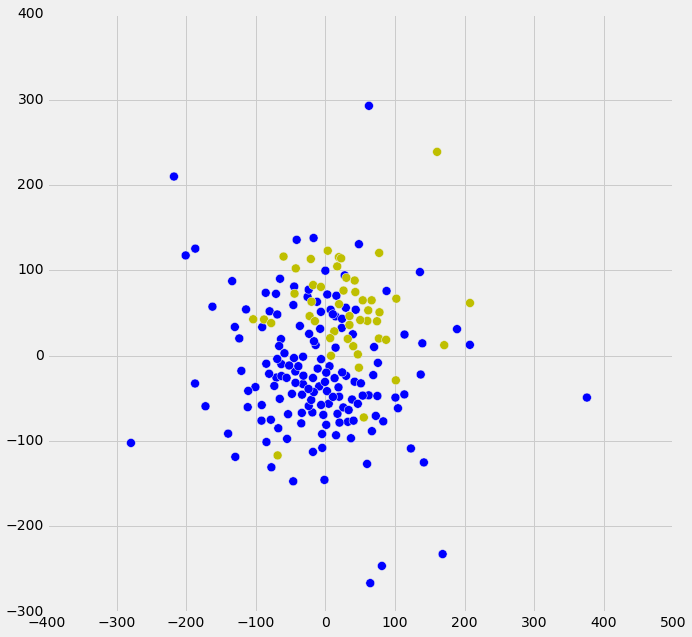

In [10]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.manifold import TSNE

all_chapters = np.append(moby_dick_chapters, little_women_chapters)
colors = ['b'] * len(moby_dick_chapters) + ['y'] * len(little_women_chapters)

word_counts = CountVectorizer().fit_transform(all_chapters)
points = TSNE().fit_transform(word_counts)

plots.figure(figsize=(10,10))
plots.scatter(points[:,0], points[:,1], s=80, c=colors)

Most of the yellow dots are clustered together. That's because the chapters from *Little Women* tend to share many of the same words: not just the character names, but descriptions of domestic life in the 1860's that differ from *Moby Dick*'s depiction of life aboard a 19th century whaling ship. 

What if someone shuffled the first chapters of *Moby Dick* and *Little Women* in their online editions? Would a computer be able to tell which chapter went with which book? In Chapter 4, we will explore the idea that similarity between data can be used to make accurate predictions about the properties of those data. Chapter 5 will explore how to integrate multiple sources of uncertain information to make decisions.